In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
from scipy.stats import binned_statistic,gaussian_kde
import seaborn
from importlib import reload

In [2]:
import YOLOtrack11
model = YOLOtrack11.YOLOtrack11("../ultralytics/runs/pose/train23/weights/last.pt")
# print(model.model.model)
print("loaded")
# results = model.train(data="data_gen/data.yaml", epochs=100, imgsz=512,)
results = model.val(save=False,z_corr=False)

print("test")

loaded
Ultralytics 8.3.51 🚀 Python-3.12.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24202MiB)
YOLO11n-zaxis summary (fused): 276 layers, 2,725,252 parameters, 0 gradients, 6.7 GFLOPs


val: Scanning /home/jupyter-till/git/ultralytics/data_gen/Dataset_hard/labels/val.cache... 50000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50000/50000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)      z MSE     xy MSE: 100%|██████████| 3125/3125 [01:05<00:00, 47.43it/s]


                   all      50000    1474292          1      0.998      0.995      0.994       1.64      0.121
Speed: 0.0ms preprocess, 0.3ms inference, 0.0ms loss, 0.2ms postprocess per image
test


In [3]:
print(f"z_mse = {results.z_mse[4]:.3f} um^2, xy_mse = {results.xy_mse[4]:.3f} um^2")

z_mse = 1.638 um^2, xy_mse = 0.121 um^2


In [4]:
average_precision = results.box.all_ap
iou_levels = np.linspace(50,95,10)
print(("%11s" * 4) % ("IOU", "AP", "z-mse","xy-mse"))
for iou, ap, z_mse, xy_mse in zip(iou_levels, results.box.all_ap.T, results.z_mse, results.xy_mse):
    print(f"         {iou:.0f}      {ap[0]:.3f}      {z_mse:.3f}      {xy_mse:.3f}")

        IOU         AP      z-mse     xy-mse
         50      0.995      2.546      0.129
         55      0.995      2.417      0.127
         60      0.995      2.276      0.125
         65      0.995      1.945      0.122
         70      0.995      1.638      0.121
         75      0.995      1.354      0.119
         80      0.995      1.029      0.117
         85      0.995      0.745      0.116
         90      0.995      0.499      0.113
         95      0.984      0.353      0.105


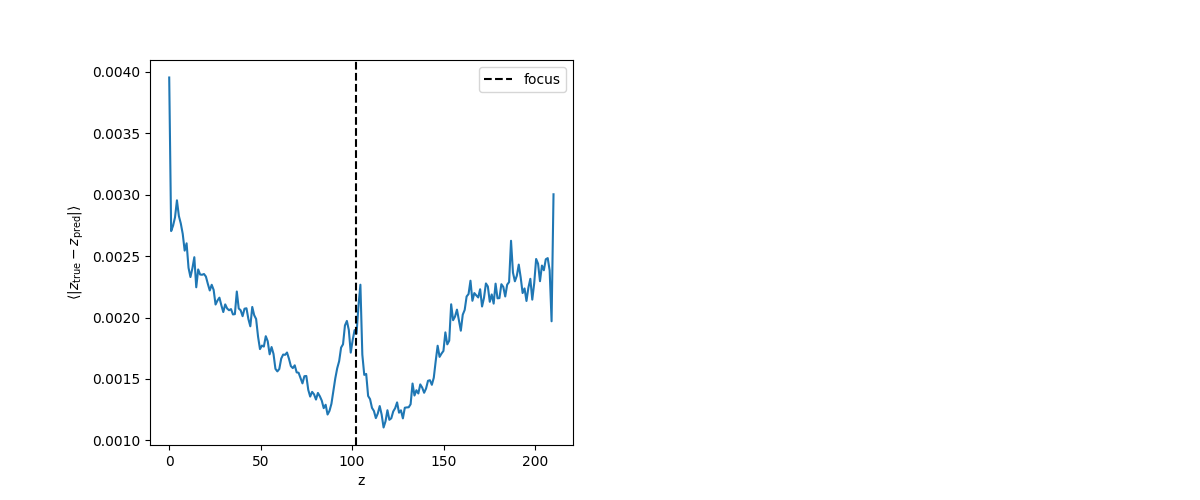

In [6]:
if(plt.get_fignums()): plt.clf()
else: plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

iou_level=5
bins=200
means = np.histogram(results.z_pairs[iou_level][0],weights=np.abs(results.z_pairs[iou_level][0]-results.z_pairs[iou_level][1]),bins=bins,density=False)[0]
hist = np.histogram(results.z_pairs[iou_level][0],bins=bins,density=False)[0]
x1 = np.linspace(0,1568*0.134,bins)
plt.plot(x1,means/hist)
plt.axvline(761*0.134,c="k",ls="--",label="focus")
plt.legend()
plt.ylabel(r"$\langle|z_{\mathrm{true}}-z_{\mathrm{pred}}|\rangle$")
plt.xlabel("z")

# plt.subplot(1,2,2)

# iou_level=5
# bins=200
# means = np.histogram(results.z_pairs[iou_level][0],weights=np.abs(results.z_pairs[iou_level][0]-results.z_pairs[iou_level][1]),bins=bins,density=False)[0]
# hist = np.histogram(results.z_pairs[iou_level][0],bins=bins,density=False)[0]
# x1 = np.linspace(0,1568*0.134,bins)
# plt.plot(x1,means/hist)
# plt.axvline(761*0.134,c="k",ls="--",label="focus")
# plt.legend()
# plt.ylabel(r"$\sqrt{MSD}_{xy}$")
# plt.xlabel("z")


plt.show()


In [ ]:
# 

(49742,)